In [1]:
import sys

print (sys.version)

3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]


In [2]:
import numpy as np

import pandas as pd

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
# sample dataset (20K malicious URLs and 20K benign URLs)
# from https://github.com/albahnsen/ML_SecurityInformatics/blob/master/datasets/phishing.csv.zip

df = pd.read_csv('phishing.csv.gz', compression='gzip')

df.head(10)

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1
5,http://lcthomasdeiriarte.edu.co/plugins/system...,1
6,http://livetoshare.org/open/service-apps.com.c...,1
7,http://www.i-m.co/reactivate/webupgrade/\n,1
8,http://manuelfernando.co/sparkatse/index.htm\n,1
9,http://www.bladesmithnews.com/confirmation-pay...,1


In [4]:
df.phishing.value_counts()

1    20000
0    20000
Name: phishing, dtype: int64

In [5]:
# remove line breaks
df['url2'] = df.url.str.rstrip()

pprint(df.url2[df.phishing == 1].sample(20, random_state=1).tolist())

['http://dothan.com.co/gold/austspark/index.htm',
 'http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2',
 'http://verify95.5gbfree.com/coverme2010/',
 'http://www.racom.com/uploads/productscat/bookmark/ii.php?.rand=13vqcr8bp0gud&cbcxt=mai&email=abuse@tradinghouse.ca',
 'http://www.cleanenergytci.com/components/update.logon.l3an7lofamerica/2342343234532534546347677898765432876543345687656543876/',
 'http://209.148.89.163/-/santander.co.uk/weblegn/AccountLogin.php',
 'http://senevi.com/confirmation/',
 'http://www.hellenkeller.cl/tmp/new/noticias/Modulo_de_Atualizacao_Bradesco/index2.php?id=PSO1AM04L3Q6PSBNVJ82QUCO0L5GBSY2KM2U9BYUEO14HCRDVZEMTRB3DGJO9HPT4ROC4M8HA8LRJD5FCJ27AD0NTSC3A3VDUJQX6XFG519OED4RW6Y8J8VC19EAAAO5UF21CHGHIP7W4AO1GM8ZU4BUBQ6L2UQVARVM',
 'http://internet-sicherheit.co/de/konflikt/src%3Dde/AZ00276ZZ75/we%3Dhs_0_2/sicherheit/konto_verifizieren/verifizierung.php',
 'http://alen.co/docs/cleaner',
 'http://rattanhouse.co/Atualizacao_Bradesco/cadastro201

In [6]:
# find the maximum length of all URLs

urls = list(df.url2)

max_len = 0

for url in urls:
  if (len(url) > max_len):
    max_len = len(url)

print('maximum length: %s '%max_len)


# calculate the average length of all URLs

numChars = []

for url in urls:
  numChars.append(len(url))

print('average length: %s'%(sum(numChars) / len(numChars)))

maximum length: 2080 
average length: 92.717225


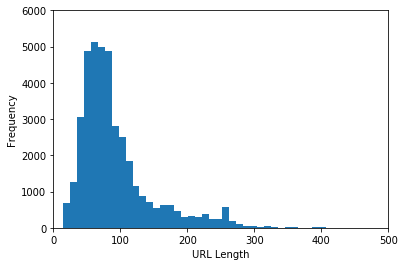

In [7]:
# draw length distribution diagram

plt.hist(numChars, 200)
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])
plt.show()

In [8]:
# find maximum lengths and calcuate average lengths

df_B = df[df.phishing == 0]
df_P = df[df.phishing == 1]

urls_B = list(df_B.url2)
urls_P = list(df_P.url2)


max_len_B = 0

for url in urls_B:
  if (len(url) > max_len_B):
    max_len_B = len(url)

print('maximum length of benign URLs: %s '%max_len_B)


numChars_B = []

for url in urls_B:
  numChars_B.append(len(url))

print('average length of benign URLs: %s'%(sum(numChars_B) / len(numChars_B)))


max_len_P = 0

for url in urls_P:
  if (len(url) > max_len_P):
    max_len_P = len(url)

print('maximum length of phishing URLs: %s '%max_len_P)


numChars_P = []

for url in urls_P:
  numChars_P.append(len(url))

print('average length of phishing URLs: %s'%(sum(numChars_P) / len(numChars_P)))

maximum length of benign URLs: 1108 
average length of benign URLs: 84.28035
maximum length of phishing URLs: 2080 
average length of phishing URLs: 101.1541


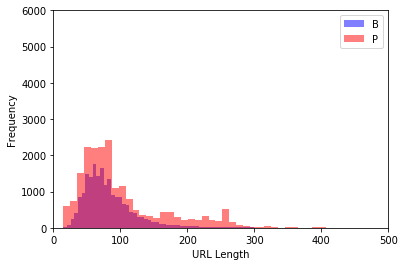

In [9]:
# draw length distribution diagrams

plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])

plt.hist(numChars_B, 200, alpha=0.5, label='B', color='b')
plt.hist(numChars_P, 200, alpha=0.5, label='P', color='r')
plt.legend(loc='upper right')
plt.show()

In [10]:
charsList = [list(url) for url in urls]

from collections import defaultdict

frequency = defaultdict(int)

for chars in charsList:
  for char in chars:
    frequency[char] += 1

print('totally %s characters found.'%(len(frequency)))

totally 98 characters found.


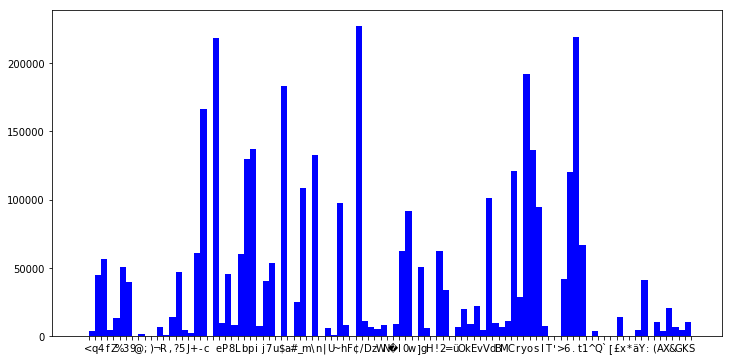

In [12]:
chars = frequency.keys()
freqs = frequency.values()

pos = np.arange(len(chars))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(chars)

plt.bar(pos, freqs, width, color='b')
# mpl.rcParams["figure.figsize"] = (12.0, 6.0)
plt.rcParams["figure.figsize"] = [12.0, 6.0]
plt.show()

In [13]:
# find rare character list

frequency2 = defaultdict(int)

for char, count in frequency.items():
  if (count < 5):
    frequency2[char] = count

print('totally %s characters with occurrence less than 5.'%(len(frequency2)))

for k, v in frequency2.items():
    print('%s : %s'%(k,v))

totally 6 characters with occurrence less than 5.
¢ : 4
\ : 1
ä : 1
£ : 4
ü : 1
> : 1


In [14]:
# extract token set from URLs

def getTokens(url):
  tokensBySlash = str(url.encode('utf-8')).split('/')	#get tokens after splitting by slash
  allTokens = []
  for i in tokensBySlash:
    tokens = str(i).split('-')	#get tokens after splitting by dash
    tokensByDot = []
    for j in range(0,len(tokens)):
      tempTokens = str(tokens[j]).split('.')	#get tokens after splitting by dot
      tokensByDot = tokensByDot + tempTokens
    allTokens = allTokens + tokens + tokensByDot
  allTokens = list(set(allTokens))	#remove redundant tokens
  if "b'http:" in allTokens:
    allTokens.remove("b'http:")
  if '' in allTokens:
    allTokens.remove('')
  if 'com' in allTokens:
    allTokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
  return allTokens

In [15]:
tokens = getTokens('http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2')

pprint(tokens)

['63',
 '78.142.63.63',
 '%7Enetsysco',
 "fc1d9c7ea4773b7ff90925c2902cb5f2'",
 '142',
 'process',
 '78']


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=getTokens)

X = vectorizer.fit_transform(list(df.url2))

Y = list(df.phishing)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
import pickle

pickle.dump(X_train, open( "X_train.pkl", "wb" ))
pickle.dump(X_test, open( "X_test.pkl", "wb" ))
pickle.dump(Y_train, open( "Y_train.pkl", "wb" ))
pickle.dump(Y_test, open( "Y_test.pkl", "wb" ))

In [19]:
from sklearn.decomposition import TruncatedSVD

X_test_SVD = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_test)

X_test_SVD.shape

(8000, 50)

In [20]:
from sklearn.manifold import TSNE

X_test_tsne = TSNE(n_components=2).fit_transform(X_test_SVD)

X_test_tsne.shape

(8000, 2)

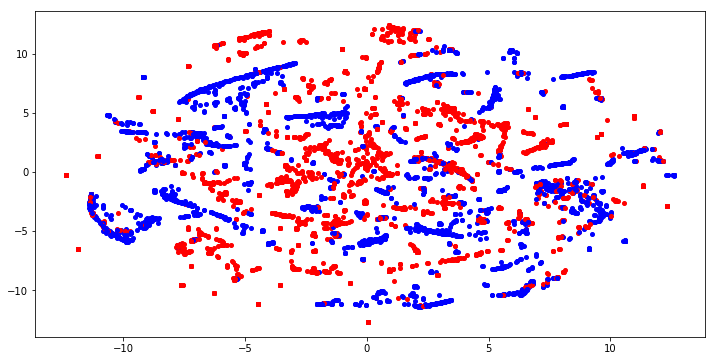

In [21]:
for i in range(len(X_test_tsne)):
    if (Y_test[i] == 0):
        color = 'b'
    elif (Y_test[i] == 1):
        color = 'r'
    else:
        color = 'g'
    plt.plot(X_test_tsne[i,0], X_test_tsne[i,1], marker='o', color=color, markersize=4)

plt.show()

In [22]:
from sklearn.decomposition import PCA

X_test_pca = PCA(n_components=2).fit_transform(X_test_SVD)

X_test_pca.shape

(8000, 2)

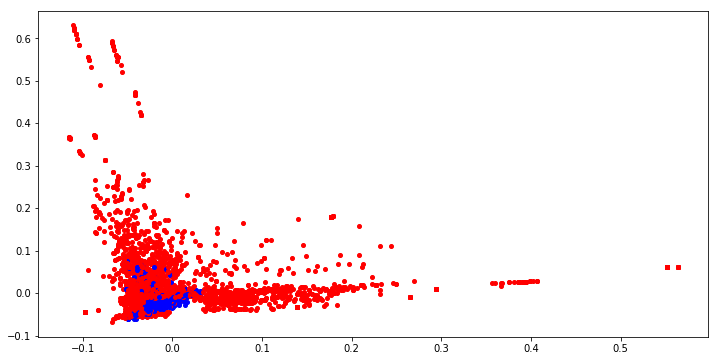

In [23]:
for i in range(len(X_test_pca)):
    if (Y_test[i] == 0):
        color = 'b'
    elif (Y_test[i] == 1):
        color = 'r'
    else:
        color = 'g'
    plt.plot(X_test_pca[i,0], X_test_pca[i,1], marker='o', color=color, markersize=4)

plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=8, max_features='sqrt', min_samples_leaf=2)

rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=8, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
accuracy_train = rf.score(X_train, Y_train) 

print('The accuracy of train data is %s'%('{percent:.2%}'.format(percent=accuracy_train)))

accuracy_test = rf.score(X_test, Y_test) 

print('The accuracy of test data is %s'%('{percent:.2%}'.format(percent=accuracy_test)))

The accuracy of train data is 97.31%
The accuracy of test data is 96.20%


In [26]:
mean_test = np.mean(Y_test)

null_accuracy = max(mean_test, (1 - mean_test))

print('null accuracy is %s'%('{percent:.2%}'.format(percent=null_accuracy)))

null accuracy is 50.01%


In [27]:
predict_labels = rf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predict_labels)

print('true negatives: %s'%cm[0,0])
print('false negatives: %s'%cm[1,0])
print('true positives: %s'%cm[1,1])
print('false positives: %s'%cm[0,1])

fpr = '{percent:.3%}'.format(percent= cm[0,1] / (cm[1,1] + cm[0,1]))
fnr = '{percent:.3%}'.format(percent= cm[1,0] / (cm[0,0] + cm[1,0]))
                             
print('false postive rate: %s'%fpr)
print('false negative rate: %s'%fnr)

true negatives: 3852
false negatives: 157
true positives: 3844
false positives: 147
false postive rate: 3.683%
false negative rate: 3.916%


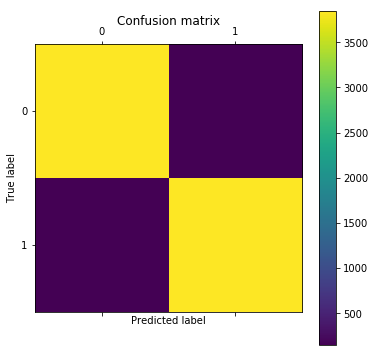

In [29]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
from sklearn.metrics import precision_score

print('precision score: %s'%precision_score(Y_test, predict_labels))


from sklearn.metrics import recall_score

print('recall score: %s'%recall_score(Y_test, predict_labels))


from sklearn.metrics import f1_score

print('f1 score: %s'%f1_score(Y_test, predict_labels))

precision score: 0.963167126034
recall score: 0.960759810047
f1 score: 0.961961961962


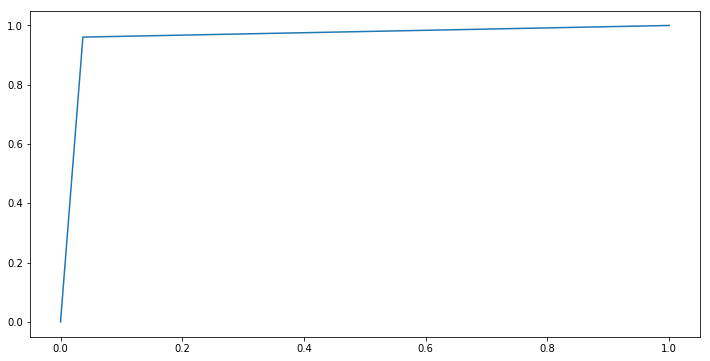

In [31]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_labels, pos_label=1)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.show() 